# Getting Started

`pyopenms_viz` allows users to visualize mass spectrometry data with minimal effort, making it ideal for software developers who do not want to focus on plotting, bioinformaticians wanting to explore their data in a python setting or experimental scientists who want more control of their data.

This is accomplished by providing a plotting interface ontop of the already widely used pandas dataframe.

This tutorial demonstrates the basic usage of `pyopenms_viz`, a plotting interface built on top of pandas for generating mass spectrometry plots like spectra, chromatograms, and peak maps.

## Tutorial Requirements:
- `pyopenms` for `.mzML` data loading
- `alphatims` for `.d` data loading

In [1]:
!pip install pyopenms alphatims --quiet
!pip install pandas==2.1.4 --quiet # this version avoids warning messages with alphatims


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pyopenms
pyopenms.__version__

'3.4.0'

In [3]:
import alphatims
alphatims.__version__

'1.0.9'

In [4]:
import pandas as pd
pd.__version__

'2.1.4'

## Overview

<div style="text-align: center;">
    <img src="img/figure1.svg" alt="PyOpenMS-Viz Figure 1" style="width: 600px; height: auto; "/>
</div>


`pyopenms-viz` is a plotting framework supporting multiple plot common mass spectrometry plot types including the Spectrum, Chromatogram, PeakMap and Mobilogram. Plotting is achieved by calling the `plot()` method on a `pd.DataFrame` object containing mass spectrometry data in long format. For more information on how to format your data into a `pd.DataFrame` please see [Data Formatting](Data Formatting/Data Formatting.rst)

### The `plot()` Method

The only function required for users of `pyopenms_viz` is the `plot()` method. This method is called directly on a pandas dataframe storing mass spectrometry data in the long format. This means that each row represents a single peak.

#### Required Arguments

1. **x** - The column name of the x-axis
2. **y** - The column name of the y-axis
4. **z** (only peakmaps) - The column name of the z-axis - represented as colour in the peakmaps
3. **kind** - The kind of plot, options include:
    - `"spectrum"` - mass-to-charge ratio vs intensity vertical line plot 
    - `"chromatogram"` - retention time vs intensity line plot
    - `"peakmap"` - scatterplot with z axes represented by color
    - `"mobilogram"` - ion mobility vs intensity line plot
5. **Backend** - The backend to plot. can be one of "ms_matplotlib", "ms_plotly" or "ms_bokeh"
    - ms_matplotlib - Standard python plotting backend, good for generating publication quality static plots 
    - ms_bokeh - Lightweight interactive plotting
    - ms_plotly - Feature rich interactive plotting, also supports 3D plots, good integration with streamlit

<div class="alert alert-info">

Note

Backend can also be set globally using

`pd.options.plotting.backend = 'ms_bokeh'`

</div>

#### Optional Arguments

Plots are highly customizable with additional arguments passed to the `plot()` method. For a full list of supported. A few notable optional arguments are mentioned below.

1. **by** - Grouping of the data, functionality depends on the plot type.
   - Spectrum = colors peaks based on grouping
   - Chromatogram/Mobilogram = Draw a separate line trace for each grouping
   - PeakMap = Different markers (e.g. "+", "." ..) for peaks of different groups
1. **show_plot** (default = True) - If `True`, the method returns `None` and the plot output. If `False` the plot is not shown and the function returns the underlying figure/axes object (depending on backend)

For a full list of arguments please see [Parameters](Parameters/Parameters.rst)

## Plot a Spectrum

The Spectrum is one of the most commonly used plots in mass spectrometry. It contains mass-to-charge ratio on the x-axis and intensity on the y-axis.  

### Downloading the Data

In this example, we will use `pyopenms` to load the .mzML file into a pandas dataframe. Examples using different packages can be found here.

In [5]:
from urllib.request import urlretrieve

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(
       gh + "/src/data/PrecursorPurity_input.mzML", "test.mzML"
   )
urlretrieve(
       gh + "/src/data/YIC(Carbamidomethyl)DNQDTISSK.mzML", "YIC(Carbamidomethyl)DNQDTISSK.mzML"
   )

('YIC(Carbamidomethyl)DNQDTISSK.mzML',
 <http.client.HTTPMessage at 0x7f51d2548770>)

### Reading the data into a `pd.DataFrame` with `pyopenms`

In [6]:
import pyopenms as oms

# Load the raw mass spectrometry data
exp = oms.MSExperiment()
oms.MzMLFile().load("YIC(Carbamidomethyl)DNQDTISSK.mzML", exp)

# Fetch the first spectrum
spectrum = oms.MSSpectrum(exp.getSpectrum(0))

# Export the spectrum to a pandas dataframe
spectrum_df = spectrum.get_df()
spectrum_df.head(5)

mz  intensity  ion_mobility ion_mobility_unit  ms_level  \
0  212.012451   6.041170           NaN            <NONE>         2   
1  217.039612   2.125546           NaN            <NONE>         2   
2  230.094986   6.776063           NaN            <NONE>         2   
3  231.250870   3.464486           NaN            <NONE>         2   
4  232.206757   2.642101           NaN            <NONE>         2   

   precursor_mz  precursor_charge      native_id sequence ion_annotation  \
0    722.324707                 2  spectrum=2624                           
1    722.324707                 2  spectrum=2624                           
2    722.324707                 2  spectrum=2624                           
3    722.324707                 2  spectrum=2624                           
4    722.324707                 2  spectrum=2624                           

   base peak m/z  base peak intensity  total ion current  lowest observed m/z  \
0            584                  906               7561                  212   
1            584                  906               7561                  212   
2            584                  906               7561                  212   
3            584                  906               7561                  212   
4            584                  906               7561                  212   

   highest observed m/z                                      filter string  \
0                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   
1                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   
2                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   
3                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   
4                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   

   preset scan configuration  
0                          2  
1                          2  
2                          2  
3                          2  
4                          2

### Plot Using `pyopenms_viz`

Now that we have the spectrum in a Pandas Dataframe, we can plot it using `pyopenms_viz`. Note that we must specify that the x-axis is the column labelled `mz` and the y-axis is the column labelled `intensity`. Furthermore, a backend must also be specified.

In [7]:
spectrum_df.plot(kind='spectrum', x='mz', y='intensity', backend='ms_bokeh')

Loading BokehJS ...

figure(id='p1001', ...)

As this plot is interactive we can zoom in using the bokeh toolbar and also hovering over the peaks will provide their annotations.

We can instead plot using matploltib by adjusting the `backend`.

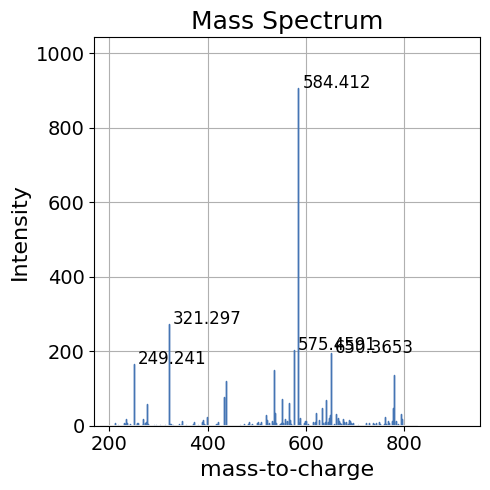

<Axes: title={'center': 'Mass Spectrum'}, xlabel='mass-to-charge', ylabel='Intensity'>

In [8]:
spectrum_df.plot(kind='spectrum', backend='ms_matplotlib', x='mz', y='intensity')

#### Further Customization

`pyopenms_viz` contains many options for plot customization. Some options are shown below. For a full list of options for customizing the spectrum please see the [Spectrum Parameters](Parameters/Spectrum.rst)

##### Base Customization Examples (Avalible for all graph types)

Below are examples of customizations avaliable for all plot types. For a full list of customization options, please see [Parameters](Parameters/Parameters.rst)

In [9]:
base_kwargs = dict(kind='spectrum', x='mz', y='intensity', backend='ms_bokeh')

#spectrum_df.plot(grid=False, **base_kwargs) # no grid

#spectrum_df.plot(relative_intensity=False, **base_kwargs) # relative intensity

#spectrum_df.plot(xlabel='m/z', **base_kwargs) # change x label

##### Spectrum Specific Customization Examples

These customizations below are specific to the spectrum plot

In [10]:
base_kwargs = dict(kind='spectrum', x='mz', y='intensity', backend='ms_bokeh')


#spectrum_df.plot(bin_peaks=False, **base_kwargs) # no binning of peaks
spectrum_df.plot(annotate_top_n_peaks=0, **base_kwargs) # no peak annotation


Loading BokehJS ...

figure(id='p1062', ...)

#### **Even Further Customization**

By default `pyopenms_viz` plot function returns nothing and just displays the plot. In the case where further customizations are required, by setting `show_plot=False` pyopenms_viz will return the underlying figure/axes object and further customizations can be performed with the underlying backend.


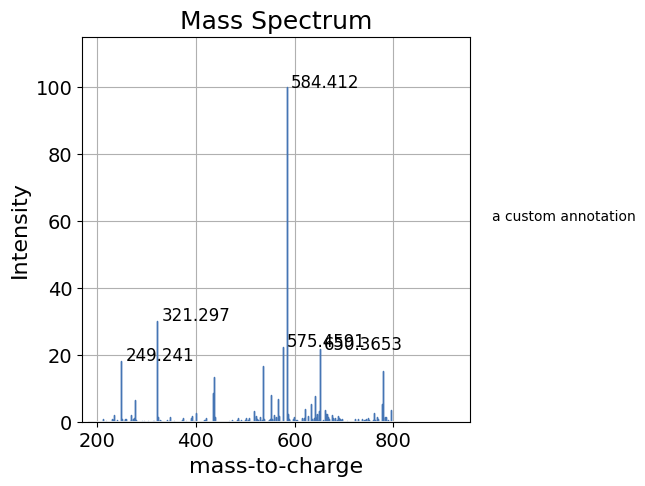

In [11]:
import matplotlib.pyplot as plt
# Save plot in matplotlib axes object
ax = spectrum_df.plot(kind='spectrum', backend='ms_matplotlib', x='mz', y='intensity', relative_intensity=True, show_plot=False)

# add a custom text annotation 
ax.text(1000, 60, "a custom annotation")

# display plot
plt.show()

#### **Saving the Plot**

If you want to save the plot, you need to set `show_plot=False`, and then use the respective backend's save method.

- For matplotlib, you can use `plt.savefig()`. For more information on saving matplotlib plots, see [here](https://matplotlib.org/stable/users/explain/figure/figure_intro.html#saving-figures).

```python
p = spectrum_df.plot(
    kind="spectrum", 
    x="mz", 
    y="intensity", 
    backend="ms_matplotlib", 
    show_plot=False
)
# Save a png file
plt.savefig('spectrum.png')
# Save an svg file
plt.savefig('spectrum.svg')
# Save a pdf file
plt.savefig('spectrum.pdf')
```

- For bokeh, you can use `output_file` method to save an html file of the iteractive plot. To save a static plot you can use the tool bar in the interactive plot to save the plot as a png. Or you can use the `export_png` method. However, this requires additional dependencies: `pip install selenium geckodriver firefox`. For more information on saving bokeh plots see [here](https://docs.bokeh.org/en/latest/docs/first_steps/first_steps_7.html#first-steps-7-displaying-and-exporting).

```python
from bokeh.io import output_file
p = spectrum_df.plot(
    kind="spectrum", 
    x="mz", 
    y="intensity", 
    backend="ms_bokeh", 
    show_plot=False
)
# Save a html file
output_file("spectrum.html")
```

- For plotly, you can use `fig.write_html()` method to save an html file of the interactive plot. To save a static plot you can use the tool bar in the interactive plot to save the plot as a png/svg/pdf. Or you can use the `write_image` method. However, this requires additional dependencies: `pip install -U kaleido`. For more information on saving plotly plots see [here](https://plotly.com/python/static-image-export/).

```python
p = spectrum_df.plot(
    kind="spectrum", 
    x="mz", 
    y="intensity", 
    backend="ms_plotly", 
    show_plot=False
)
# Save a html file
p.write_html("spectrum.html")
```

## Annotating A Spectrum 

If there is a peptide spectrum match, it is useful to annotate the spectrum with the fragments of the expected peptide so that one can manually evalute the match. Here, we demonstrate how to do this with `pyopenms_viz` and `pyopenms`

### Create a mirror reference spectrum using `pyopenms`

Using `pyopenms` we can create a theoretical spectrum on the peptide `YIC(Carbamidomethyl)DNQDTISSK` to compare with the experimental spectrum shown above. This is adapted from the pyopenms tutorial [here](https://pyopenms.readthedocs.io/en/latest/user_guide/spectrum_alignment.html)

In [12]:
# Generate theoretical spectrum
tsg = oms.TheoreticalSpectrumGenerator()
theo_spec = oms.MSSpectrum()
peptide = oms.AASequence.fromString("YIC(Carbamidomethyl)DNQDTISSK")
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(theo_spec, peptide, 1, 2)
theo_spec_df = theo_spec.get_df()

### Plot the Spectrum and Mirror Spectrum

To plot with pyopenms_viz, all that is required is the addtional `reference_spectrum` parameter which contains a pandas dataframe of the theoretical spectrum and to change `mirror_spectrum` to `True`

In [13]:
spectrum_df.plot(kind='spectrum', 
                 backend='ms_bokeh', 
                 x='mz', 
                 y='intensity', 
                 annotate_top_n_peaks=0,
                 reference_spectrum=theo_spec_df,
                 title='Peptide YIC(Carbamidomethyl)DNQDTISSK',
                 title_font_size=12,
                 mirror_spectrum=True)

Loading BokehJS ...

figure(id='p1118', ...)

### Annotating the Experimental Spectrum

We can annotate the experimental spectrum by aligning it to the theoretical spectrum and taking the labels of the fragment ions from the theoretical spectrum.

First we perform spectrum alignment using `pyopenms`

In [14]:
alignment = []
spa = oms.SpectrumAlignment()
p = spa.getParameters()
# use 0.5 Da tolerance for m/z (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
# align both spectra
spa.getSpectrumAlignment(alignment, theo_spec, spectrum)

Next we update the spectrum_df with the ion annotations

In [15]:
for theo_spec_idx, exp_spec_idx in alignment:
    spectrum_df.loc[exp_spec_idx, 'ion_annotation'] = theo_spec_df.loc[theo_spec_idx, 'ion_annotation']

Now that we have annotated the spectrum we can plot it. To include annotations in the plot `pyopenms_viz` expects a column name for the `ion_annotation` argument.

In [16]:
spectrum_df.plot(kind='spectrum', 
                 backend='ms_bokeh', 
                 x='mz', 
                 y='intensity', 
                 annotate_top_n_peaks=3,
                 ion_annotation='ion_annotation',
                 title='Peptide YIC(Carbamidomethyl)DNQDTISSK',
                 title_font_size=12)

Loading BokehJS ...

figure(id='p1189', ...)

By default when we set ion_annotation the y ions are colored in red and the b ions are colored in blue. Howevering over the peaks will now show the matched ion annotation

We can also combine the reference spectrum with the ion annotation in one plot.

In [17]:
spectrum_df.plot(kind='spectrum', 
                 backend='ms_bokeh', 
                 x='mz', 
                 y='intensity', 
                 annotate_top_n_peaks=0,
                 ion_annotation='ion_annotation',
                 title='Peptide YIC(Carbamidomethyl)DNQDTISSK',
                 title_font_size=12,
                 legend_config=dict(show=False),
                 mirror_spectrum=True,
                 reference_spectrum=theo_spec_df)

Loading BokehJS ...

figure(id='p1506', ...)

## Plot a PeakMap

A peakmap is a useful plot for generating an overview of the entire profile (MS1) data. In this representation all analytes can be visualized across time. 

### Download Data and Load Data

Here, we are using a slice of 100 seconds of a metabolomics dataset which only contains MS1 information. In peakmap plots, it does not make sense to plot both MS1 and MS2 data in a single plot.

In [18]:
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/FeatureFinderMetaboIdent_1_input.mzML", "test.mzML")

# open .mzML file using pyopenms
exp = oms.MSExperiment()
oms.MzMLFile().load("test.mzML", exp)

# convert pyopenms object to pandas dataframe
exp_df = exp.get_df(long=True)
exp_df

RT          mz          inty  ms_level
0       200.495300  250.117493   1078.637085         1
1       200.495300  250.118027   2352.115234         1
2       200.495300  250.118561   3718.094482         1
3       200.495300  250.119080   4042.395020         1
4       200.495300  250.119614   2848.561035         1
...            ...         ...           ...       ...
117667  299.812897  274.114136   7654.166992         1
117668  299.812897  274.114746  10584.880859         1
117669  299.812897  274.115356   9032.423828         1
117670  299.812897  274.115967   5456.675293         1
117671  299.812897  274.116577   2176.139404         1

[117672 rows x 4 columns]

In [19]:
exp_df.plot(kind='peakmap', backend='ms_bokeh', x='RT', y='mz', z='inty')

Loading BokehJS ...

figure(id='p2429', ...)

### PeakMap Specific Customization examples

Below are some customizations that are specific to the `"peakMap"` plot. Note that some of these customizations, such as binning are also available for the `"spectrum"` plot however they are not avaliable for all plot types (e.g. `"chromatogram"`). For a full list of customizations please see the [PeakMap Parameters](Parameters/PeakMap.rst).

#### Log-Scaling

You can add the argument `"z_log_scale = True"` to log-scale the intensities (z-axis).


Useful when you want to enhance visualization of intensity variations or when you want to reduce dominant peak effects.

In [20]:
#from bokeh.io import output_notebook
#output_notebook()
base_kwargs = dict(kind='peakmap', backend='ms_bokeh', x='RT', y='mz', z='inty')

exp_df.plot(z_log_scale=True, **base_kwargs)

Loading BokehJS ...

figure(id='p2494', ...)

#### Adapting Bin Size in Peak Map Plots

By default, the peak map uses binning to optimize visualization. You can **adjust the binning** level to balance between performance and detail.

- **Low binning** (faster rendering, lower detail):
- **High binning** (slower rendering, higher detail):

You can also remove binning of peaks adding the argument `"bin_peaks = False"`, but can be slow on large datasets.

Below are examples demonstrating how to adjust bin size in peak map plots.

In [21]:
# Example 1: Low binning (faster rendering, lower detail)

base_kwargs = dict(kind='peakmap', backend='ms_bokeh', x='RT', y='mz', z='inty')

exp_df.plot(num_x_bins=20, num_y_bins=20, **base_kwargs)

Loading BokehJS ...

figure(id='p2559', ...)

In [22]:
# Example 2: High binning (slower rendering, higher detail)

base_kwargs = dict(kind='peakmap', backend='ms_bokeh', x='RT', y='mz', z='inty')

exp_df.plot(num_x_bins=100, num_y_bins=100, **base_kwargs)

Loading BokehJS ...

figure(id='p2624', ...)

In [23]:
# Example 3: No bin peaks

base_kwargs = dict(kind='peakmap', backend='ms_bokeh', x='RT', y='mz', z='inty')

exp_df.plot(bin_peaks = False, **base_kwargs)

Loading BokehJS ...

figure(id='p2689', ...)

#### PeakMap with Marginals

One useful customization is to plot the peak map with marginal plots. The marginal plots sum the x and y axis respectively to provide a supplemental view of the data. 

In [24]:
base_kwargs = dict(kind='peakmap', backend='ms_bokeh', x='RT', y='mz', z='inty')

exp_df.plot(add_marginals=True, **base_kwargs)

/opt/hostedtoolcache/Python/3.12.11/x64/lib/python3.12/site-packages/pyopenms_viz/_bokeh/core.py:594: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  y_fig.legend.orientation = self.y_plot_config.legend_config.orientation


Loading BokehJS ...

GridPlot(id='p2915', ...)

## Chromatogram Plot

A chromatogram plot is useful for visualizing intensity across retention time. This can either be the total ion current across retention time or the ion curent from a specific region across m/z as used in targeted apporaches. 

In this example, we will visualize the total ion current of the metabolomics dataset above. By default, pyopenms_viz does not manipulate the supplied 

In [25]:
exp_df.plot(kind='chromatogram', backend='ms_bokeh', x='RT', y='inty')

/opt/hostedtoolcache/Python/3.12.11/x64/lib/python3.12/site-packages/pyopenms_viz/_core.py:576: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  self._check_and_aggregate_duplicates()


Loading BokehJS ...

figure(id='p2930', ...)

<div class="alert alert-info">

Note

By default pyopenms_viz does not manipulate the supplied dataframe meaning that there might be multiple points plotted at a single retention time value leading to unexpected plots. Peaks can be automatically summed up using `aggregate_duplicates=True`

</div>

In [26]:
exp_df.plot(kind='chromatogram', backend='ms_bokeh', x='RT', y='inty', aggregate_duplicates=True)

Loading BokehJS ...

figure(id='p2994', ...)

In this dataset different features are resolved nicely as indicated by nicely seperable peaks. 

### Chromatogram Specific Customizations

For a full list of chromatogram specific customizations please see [Chromatogram Parameters](Parameters/Chromatogram.rst)

## Case Example: Inspecting a Peptide in DIA

In this example, we will show how `pyopenms_viz` can be used to inspec a target peptide in Data Indepdent Acquisition. For this, we will be using a timsTOF dataset and show how `pyopenms_viz` integrates well with [alphatims](https://github.com/MannLabs/alphatims) 

### Download the Data

In [27]:
import requests
import zipfile
import os

# Define the URL and file name
url = 'https://github.com/MannLabs/alphatims/releases/download/0.1.210317/20201207_tims03_Evo03_PS_SA_HeLa_200ng_EvoSep_prot_high_speed_21min_8cm_S1-C8_1_22474.d.zip'
file_name = '20201207_tims03_Evo03_PS_SA_HeLa_200ng_EvoSep_prot_high_speed_21min_8cm_S1-C8_1_22474.d.zip'
extract_dir = './'  # Directory to extract the contents

# Download the file
response = requests.get(url)
with open(file_name, 'wb') as file:
    file.write(response.content)

print(f'File {file_name} downloaded successfully!')

# Unzip the file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'File extracted to {extract_dir}!')

# Optionally, remove the zip file after extraction
os.remove(file_name)
print(f'Zip file {file_name} removed.')

File 20201207_tims03_Evo03_PS_SA_HeLa_200ng_EvoSep_prot_high_speed_21min_8cm_S1-C8_1_22474.d.zip downloaded successfully!


File extracted to ./!


Zip file 20201207_tims03_Evo03_PS_SA_HeLa_200ng_EvoSep_prot_high_speed_21min_8cm_S1-C8_1_22474.d.zip removed.


In [28]:
import alphatims.bruker
bruker_dia_d_folder_name = "./20201207_tims03_Evo03_PS_SA_HeLa_200ng_EvoSep_prot_high_speed_21min_8cm_S1-C8_1_22474.d"
dia_data = alphatims.bruker.TimsTOF(bruker_dia_d_folder_name)

  0%|          | 0/11868 [00:00<?, ?it/s]

  0%|          | 1/11868 [00:02<9:17:31,  2.82s/it]

  4%|▍         | 484/11868 [00:02<00:48, 233.30it/s]

  8%|▊         | 972/11868 [00:03<00:20, 532.72it/s]

 12%|█▏        | 1455/11868 [00:03<00:11, 894.86it/s]

 16%|█▋        | 1936/11868 [00:03<00:07, 1315.10it/s]

 20%|██        | 2377/11868 [00:03<00:05, 1685.90it/s]

 24%|██▎       | 2795/11868 [00:03<00:04, 1948.54it/s]

 27%|██▋       | 3173/11868 [00:03<00:04, 2071.70it/s]

 30%|██▉       | 3509/11868 [00:03<00:03, 2114.85it/s]

 32%|███▏      | 3810/11868 [00:03<00:03, 2131.31it/s]

 34%|███▍      | 4086/11868 [00:04<00:03, 2117.08it/s]

 37%|███▋      | 4341/11868 [00:04<00:03, 2079.03it/s]

 39%|███▊      | 4578/11868 [00:04<00:03, 2027.29it/s]

 40%|████      | 4801/11868 [00:04<00:03, 1912.95it/s]

 42%|████▏     | 5006/11868 [00:04<00:03, 1885.36it/s]

 44%|████▍     | 5204/11868 [00:04<00:03, 1819.61it/s]

 45%|████▌     | 5392/11868 [00:04<00:03, 1746.66it/s]

 47%|████▋     | 5571/11868 [00:04<00:03, 1696.56it/s]

 48%|████▊     | 5743/11868 [00:05<00:03, 1646.94it/s]

 50%|████▉     | 5909/11868 [00:05<00:03, 1600.21it/s]

 51%|█████     | 6070/11868 [00:05<00:03, 1551.31it/s]

 52%|█████▏    | 6226/11868 [00:05<00:03, 1543.78it/s]

 54%|█████▍    | 6386/11868 [00:05<00:03, 1556.62it/s]

 55%|█████▌    | 6542/11868 [00:05<00:03, 1529.86it/s]

 56%|█████▋    | 6696/11868 [00:05<00:03, 1530.60it/s]

 58%|█████▊    | 6850/11868 [00:05<00:03, 1532.27it/s]

 59%|█████▉    | 7005/11868 [00:05<00:03, 1500.19it/s]

 60%|██████    | 7175/11868 [00:05<00:03, 1557.28it/s]

 62%|██████▏   | 7332/11868 [00:06<00:02, 1552.20it/s]

 63%|██████▎   | 7488/11868 [00:06<00:02, 1550.01it/s]

 64%|██████▍   | 7646/11868 [00:06<00:02, 1557.85it/s]

 66%|██████▌   | 7803/11868 [00:06<00:02, 1548.93it/s]

 67%|██████▋   | 7958/11868 [00:06<00:02, 1536.72it/s]

 68%|██████▊   | 8120/11868 [00:06<00:02, 1546.75it/s]

 70%|██████▉   | 8281/11868 [00:06<00:02, 1560.73it/s]

 71%|███████   | 8444/11868 [00:06<00:02, 1576.78it/s]

 73%|███████▎  | 8616/11868 [00:06<00:02, 1618.56it/s]

 74%|███████▍  | 8783/11868 [00:06<00:01, 1632.25it/s]

 75%|███████▌  | 8955/11868 [00:07<00:01, 1657.36it/s]

 77%|███████▋  | 9134/11868 [00:07<00:01, 1690.29it/s]

 79%|███████▊  | 9321/11868 [00:07<00:01, 1735.45it/s]

 80%|████████  | 9514/11868 [00:07<00:01, 1790.82it/s]

 82%|████████▏ | 9705/11868 [00:07<00:01, 1824.64it/s]

 84%|████████▎ | 9915/11868 [00:07<00:01, 1892.09it/s]

 85%|████████▌ | 10146/11868 [00:07<00:00, 2009.99it/s]

 88%|████████▊ | 10389/11868 [00:07<00:00, 2131.38it/s]

 90%|████████▉ | 10655/11868 [00:07<00:00, 2285.95it/s]

 92%|█████████▏| 10968/11868 [00:07<00:00, 2532.50it/s]

 95%|█████████▌| 11306/11868 [00:08<00:00, 2784.85it/s]

 98%|█████████▊| 11585/11868 [00:08<00:00, 2717.12it/s]

100%|██████████| 11868/11868 [00:08<00:00, 1436.14it/s]

### Extracting Data for peptide

Let's modify the `inspect_peptide` method from [alphatims/nbs
/tutorial.ipynb](https://github.com/MannLabs/alphatims/blob/master/nbs/tutorial.ipynb) to return a dataframe with extracted data for the target precursor and fragemnt ions.

In [29]:
def inspect_peptide(
    dia_data,
    peptide,
    ppm=50,
    rt_tolerance=30, #seconds
    mobility_tolerance=0.05, #1/k0
):
    precursor_mz = peptide["mz"]
    precursor_mobility = peptide["mobility"]
    precursor_rt = peptide["rt"]
    fragment_mzs = peptide["fragment_mzs"]
    rt_slice = slice(
        precursor_rt - rt_tolerance,
        precursor_rt + rt_tolerance
    )
    im_slice = slice(
        precursor_mobility - mobility_tolerance,
        precursor_mobility + mobility_tolerance
    )
    precursor_mz_slice = slice(
        precursor_mz / (1 + ppm / 10**6),
        precursor_mz * (1 + ppm / 10**6)
    )
    precursor_indices = dia_data[
        rt_slice,
        im_slice,
        0, #index 0 means that the quadrupole is not used
        precursor_mz_slice,
        "raw"
    ]
    prec_df = dia_data.as_dataframe(precursor_indices)
    prec_df['Annotation'] = 'prec'
    # print(f"Info: Shape of prec - {prec_df.shape}")

    all_dfs = []
    all_dfs.append(prec_df)
    for fragment_name, mz in fragment_mzs.items():
        fragment_mz_slice = slice(
            mz / (1 + ppm / 10**6),
            mz * (1 + ppm / 10**6)
        )
        fragment_indices = dia_data[
            rt_slice,
            im_slice,
            precursor_mz_slice,
            fragment_mz_slice,
            "raw"
        ]
        frag_df = dia_data.as_dataframe(fragment_indices)
        frag_df['Annotation'] = fragment_name
        all_dfs.append(frag_df)

    all_df = pd.concat(all_dfs, axis=0)
    all_df['ms_level'] = all_df['Annotation'].apply(lambda x: 1 if x == 'prec' else 2)

    return all_df


Let's create a peptide dictionary with target coordinates for our target peptide

In order to extract a peptide, we need information on the peptide. For this example we will use peptide `YNDTFWK` below.

In [30]:
peptide = {
    "sequence": "YNDTFWK",
    "mz": 487.22439,
    "mobility": 0.81,
    "rt": 9.011 * 60, #seconds
    "charge": 2,
    "fragment_mzs": {
        "y7": 973.44145,
        "y6": 810.37812,
        "y5": 696.33520,
        "y4": 581.30825,
        "y3": 480.26057,
        "y2": 333.19216,
        "y1": 147.11285,
        "b1": 164.07065,
        "b2": 278.11358,
        "b3": 393.14052,
        "b4": 494.18820,
        "b5": 641.25661,
        "b6": 827.33592,
        "b7": 955.43089,
    }    
}


In [31]:
dia_df = inspect_peptide(dia_data, peptide, 50, 70, 0.1)
dia_df

raw_indices  frame_indices  scan_indices  precursor_indices  \
0      146798839           4438           694                  0   
1      146799536           4438           695                  0   
2      146802782           4438           700                  0   
3      146809110           4438           711                  0   
4      146809639           4438           712                  0   
..           ...            ...           ...                ...   
151    255542671           5684           671                  4   
152    257300501           5702           746                  4   
153    260842198           5738           715                  4   
154    261754335           5747           749                  4   
155    262643510           5756           730                  4   

     push_indices  tof_indices   rt_values  rt_values_min  mobility_values  \
0         4119158       152514  470.926503       7.848775         0.865903   
1         4119159       152515  470.926503       7.848775         0.864769   
2         4119164       152516  470.926503       7.848775         0.859099   
3         4119175       152519  470.926503       7.848775         0.846621   
4         4119176       152519  470.926503       7.848775         0.845486   
..            ...          ...         ...            ...              ...   
151       5275423       264156  602.997099      10.049952         0.891960   
152       5292202       264157  604.905047      10.081751         0.806864   
153       5325579       264145  608.719248      10.145321         0.842081   
154       5333965       264155  609.673048      10.161217         0.803453   
155       5342298       264152  610.627758      10.177129         0.825048   

     quad_low_mz_values  quad_high_mz_values   mz_values  intensity_values  \
0                  -1.0                 -1.0  487.228624                54   
1                  -1.0                 -1.0  487.232119                68   
2                  -1.0                 -1.0  487.235614                61   
3                  -1.0                 -1.0  487.246098               144   
4                  -1.0                 -1.0  487.246098                94   
..                  ...                  ...         ...               ...   
151               475.0                500.0  955.470987               145   
152               475.0                500.0  955.475880               158   
153               475.0                500.0  955.417157                79   
154               475.0                500.0  955.466093                93   
155               475.0                500.0  955.451412               152   

     corrected_intensity_values Annotation  ms_level  
0                            54       prec         1  
1                            68       prec         1  
2                            61       prec         1  
3                           144       prec         1  
4                            94       prec         1  
..                          ...        ...       ...  
151                         145         b7         2  
152                         158         b7         2  
153                          79         b7         2  
154                          93         b7         2  
155                         152         b7         2  

[19375 rows x 16 columns]

### Globally Set Plotting Backend

Let's globally set the plotting backend so it does not have to be specified in each function call.

In [32]:
pd.options.plotting.backend = 'ms_bokeh'

### Chromatogram Plotting  <a class="anchor" id="seventh-bullet"></a>

Let's plot an extracted ion chromatgram, but before we do that, let's preprocess the data and integrate the intensity values across ion mobility dimension to get an integrated extracted ion chromatogram per precursor and fragment ions.

If we plot the dia_df chromatograms at baseline, we will have multiple points per RT point (due to multiple points across ion mobility). To address this we can use the `aggregate_duplicates=True` argument. Furthermore, setting `by='Annotation` tells `pyopenms_viz` to plot each annotation as a seperate chromatogram.

In [33]:
dia_df.plot(x='rt_values', 
            y='intensity_values', 
            kind='chromatogram', 
            by='Annotation', # each annotation as seperate chromatogram
            aggregate_duplicates=True,
            width=700,
            legend_config=dict(title='Annotation'),
            title="Extracted Chromatogram for YNDTFWK_2",
            title_font_size=14)

Loading BokehJS ...

figure(id='p3056', ...)

Based on the plot above, it looks like this peptide precursor elutes from 594.40 to 605 seconds. We can draw these boundaries on the chromatogram by specifiying the `annotation_data` dataframe.  We can also extract across retention time to better see the feature.

In [34]:
annotation_data = pd.DataFrame(dict(leftWidth=[594.40], rightWidth=[605]))

# filter df across rt
dia_df_small = dia_df[dia_df['rt_values'].between(500, 700)]

dia_df_small.plot(x='rt_values', 
            y='intensity_values', 
            kind='chromatogram', 
            by='Annotation', # each annotation as seperate chromatogram
            aggregate_duplicates=True,
            annotation_data=annotation_data,
            width=700,
            height=500,
            legend_config = dict(title='Annotation'),
            title="Extracted Chromatogram for YNDTFWK_2",
            title_font_size=14)

Loading BokehJS ...

figure(id='p3328', ...)

Grouping is not only limited to `Annnotation` we can change the `by` parameter to `ms_level` to get the total ion chromatograms for MS1 and MS2 levels respectively.

In [35]:
annotation_data = pd.DataFrame(dict(leftWidth=[594.40], rightWidth=[605]))

# filter df across rt
dia_df_small = dia_df[dia_df['rt_values'].between(500, 700)]

dia_df_small.plot(x='rt_values', 
            y='intensity_values', 
            kind='chromatogram', 
            by='ms_level', # each ms_level as a seperate chromatogram
            aggregate_duplicates=True,
            annotation_data=annotation_data,
            width=700,
            height=500,
            legend_config = dict(title='Annotation'),
            title="Extracted Chromatogram for YNDTFWK_2",
            title_font_size=14)

Loading BokehJS ...

figure(id='p3611', ...)

### Mobilogram Plotting

We can also plot the extracted ion mobilogram as shown below

In [36]:
group_cols=['ms_level', 'Annotation', 'mobility_values']
integrate_col = 'intensity_values'
dia_xim_df = dia_df.apply(
                lambda x: x.fillna(0) if x.dtype.kind in "biufc" else x.fillna(".")
            ) \
            .groupby(group_cols)[integrate_col] \
            .sum() \
            .reset_index()

In [37]:
dia_df.plot(x='mobility_values',
                  y='intensity_values',
                  kind='mobilogram',
                  by='Annotation',
                  title = f"Extracted Spectrum for YNDTFWK_2",
                  height=500, width=700,
                  grid=False, # Remove the grid
                  aggregate_duplicates=True
                 )

Loading BokehJS ...

figure(id='p3702', ...)

### Spectrum Plotting

Let's take a look at the extracted ion spectrum data. Since we have annotation labels for the extracted spectrum, we can add these to the plot as shown below. Here we will use the `"ms_matplotlib"` backend to generate a static plot.

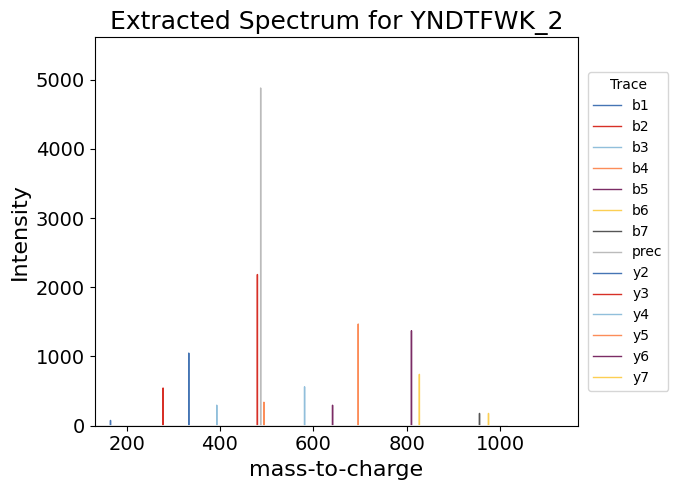

<Axes: title={'center': 'Extracted Spectrum for YNDTFWK_2'}, xlabel='mass-to-charge', ylabel='Intensity'>

In [38]:
dia_df.plot(x="mz_values", 
            y="intensity_values", 
            kind="spectrum", 
            by="Annotation", 
            title = f"Extracted Spectrum for YNDTFWK_2",
            backend='ms_matplotlib',
            aggregate_duplicates=True,
            height=500, width=700,
            annotate_top_n_peaks=0,
            grid=False, # Remove the grid
            legend_config = dict(title='Trace', bbox_to_anchor=(1.2,0.5)))

### 2D Peak Map Plotting 

An alternative usage to the peakmap plot is to plot retetion time vs ion mobility for a single mass trace. This usage is demonstrated below.
Let's see what the retention time and ion mobility peak map looks like for the mass range of the precursor ion across all MS1 spectra.

In [39]:
dia_df_prec = dia_df[dia_df['Annotation'] == 'prec']

In [40]:
dia_df_prec.plot(x="rt_values",  
               y="mobility_values",  
               z="intensity_values",  
               kind="peakmap",  
               xlabel="Retention Time [sec]",  
               ylabel="Ion Mobility",  
               height=600,
               width=700, 
               grid=False) 

/opt/hostedtoolcache/Python/3.12.11/x64/lib/python3.12/site-packages/pyopenms_viz/_core.py:1133: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  self._check_and_aggregate_duplicates()


Loading BokehJS ...

figure(id='p3975', ...)

As expected, we see an intense signal with a retention time ~600 consistent with the chromatogram above and ion mobility of ~0.81.

Since intensity can be difficult to gauge only by color, we can also add marginal plots which sums up the x and y-axis respectively

/opt/hostedtoolcache/Python/3.12.11/x64/lib/python3.12/site-packages/pyopenms_viz/_core.py:1133: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  self._check_and_aggregate_duplicates()


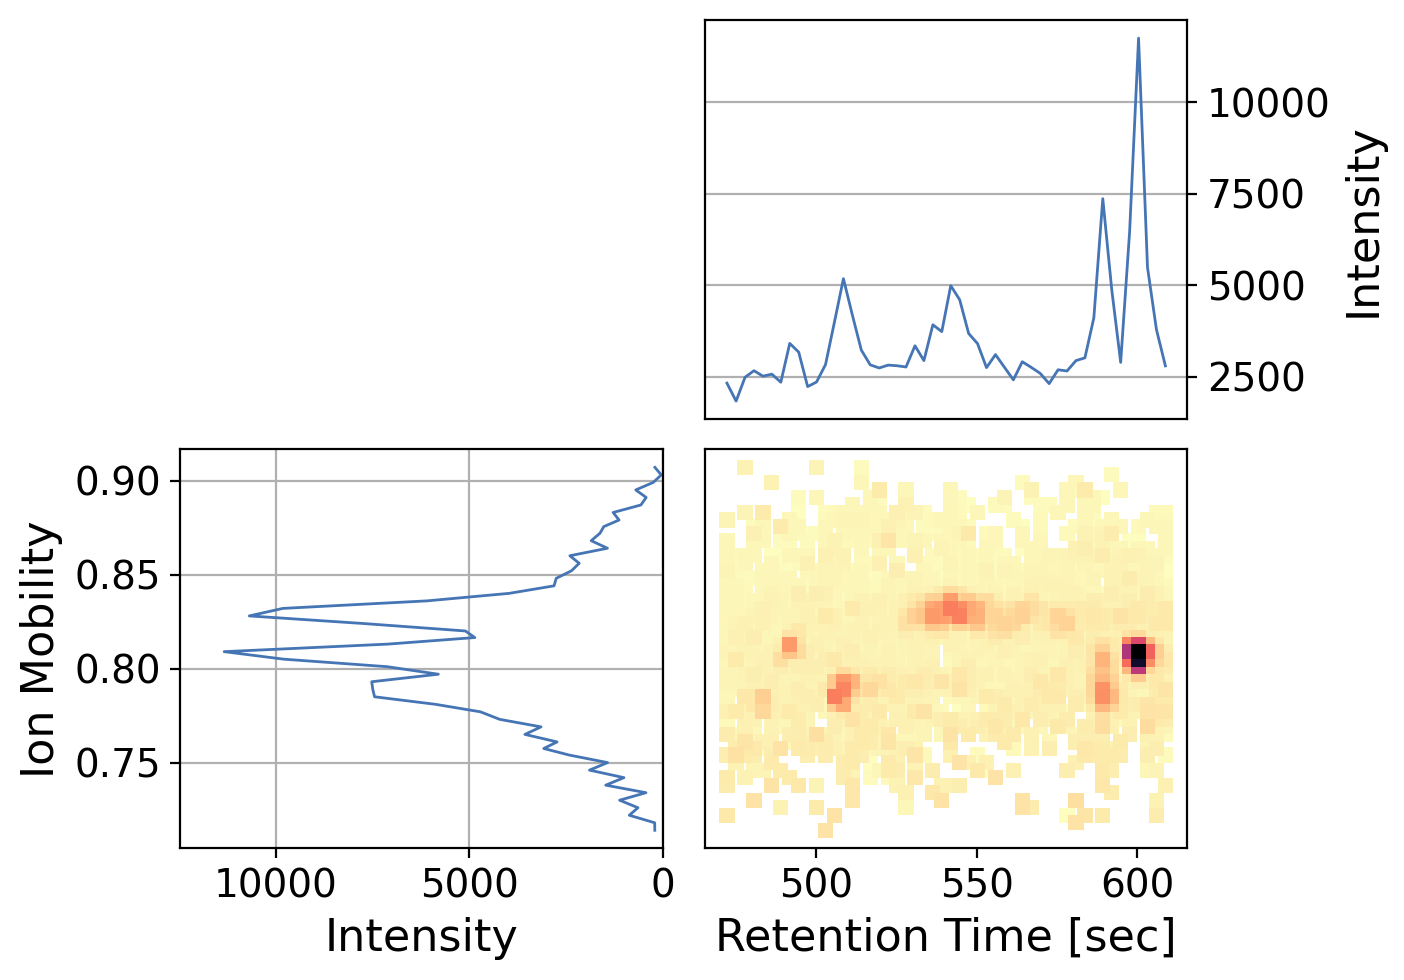

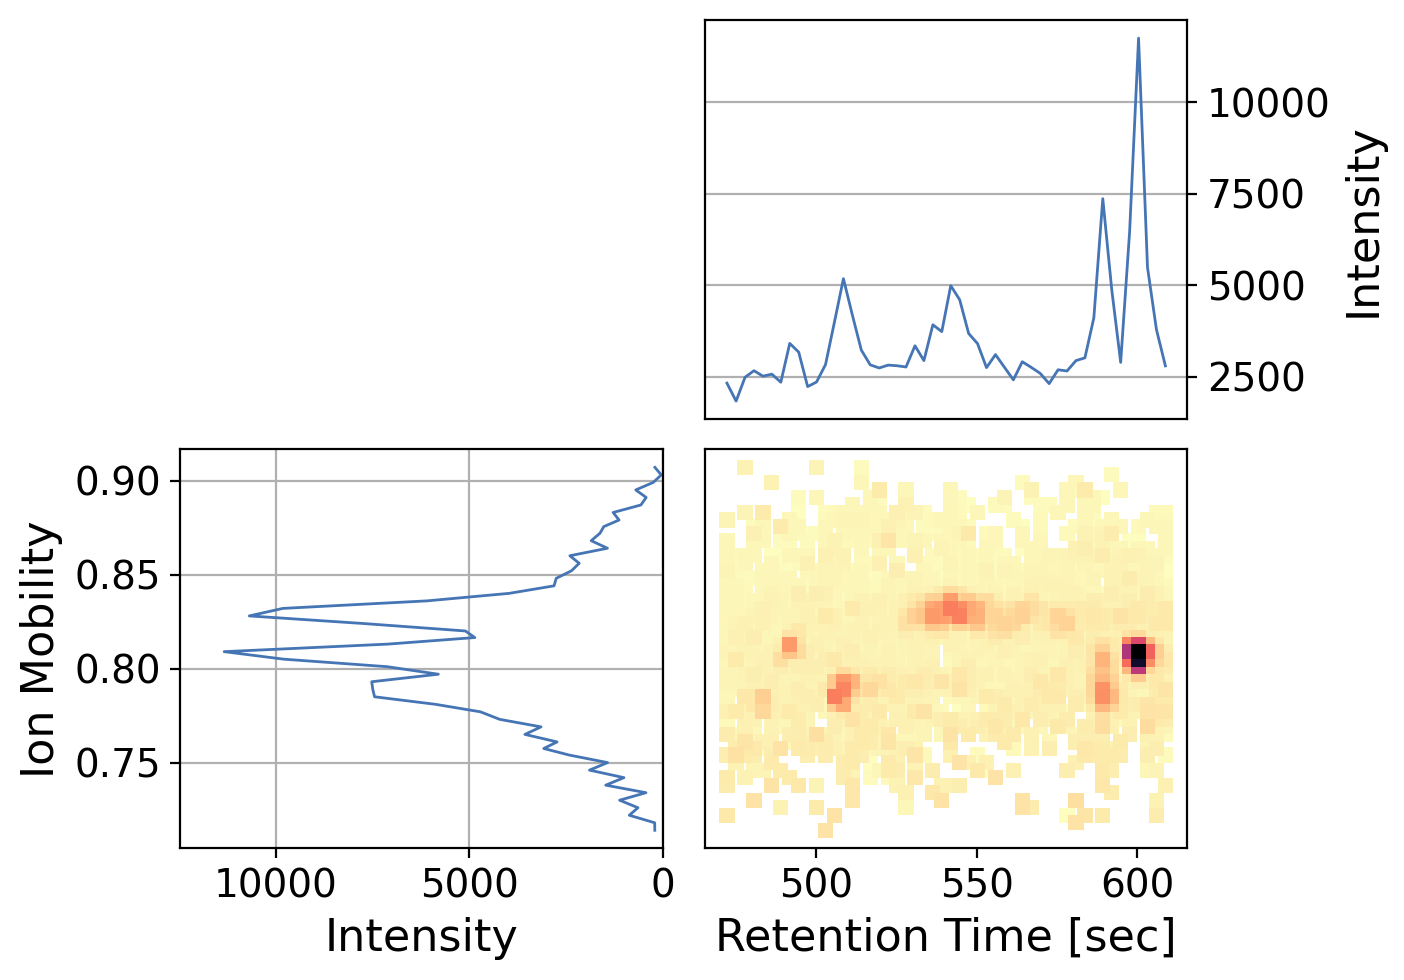

In [41]:
dia_df_prec.plot(x="rt_values",  
               y="mobility_values",  
               z="intensity_values",  
               kind="peakmap",  
               xlabel="Retention Time [sec]",  
               ylabel="Ion Mobility",
               add_marginals=True,
               width=700, 
               backend='ms_matplotlib',  
               y_kind='chromatogram', # specify on x marginal axis to plot as a chromatogram rather than a spectrum  
               x_kind='chromatogram', # specify on x marginal axis to plot as a chromatogram rather than a spectrum  
               grid=False) 